In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import pynbody
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue, pynbody.halo.hop.HOPCatalogue]

%matplotlib inline
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})

In [2]:
def read_file(path, halo_num):
    data = []
    with open(path,'rb') as f:
        while True:
            try: 
                data.append(pickle.load(f))
            except EOFError:
                break
    data = pd.DataFrame(data)
    
    data = data.drop([727]) # halo 116
    
    data = data[data.z0haloid == halo_num]
    data = data[data.mstar != 0]

    return data

In [11]:
snapshots = ['h329.cosmo50PLK.3072gst5HbwK1BH.004096', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.004032', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003936', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003840', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003744', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003648', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003606', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003552', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003456', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003360', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003264', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003195', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003168', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003072',
             'h329.cosmo50PLK.3072gst5HbwK1BH.002976', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002880', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002784', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002688', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002592', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002554', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002496', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002400', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002304',
             'h329.cosmo50PLK.3072gst5HbwK1BH.002208', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002112', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002088', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002016', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001920', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001824',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001740',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001728',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001632', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001536', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001475', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001440', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001344', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001269', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001248',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001152', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001106', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001056', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000974', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000960',
             'h329.cosmo50PLK.3072gst5HbwK1BH.000864', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000776', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000768', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000672', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000637', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000576', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000480', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000456', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000384', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000347', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000288', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000275', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000225', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000192', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000188', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000139', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000107', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000096', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000071']

path = '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/'

haloids = [29, 27, 23, 21, 18, 17, 15, 14, 13, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 11, 13, 12, 14, 13, 12, 12, 11, 
         11, 11, 11, 11, 10, 11, 10, 9, 9, 20, 22, 26, 27, 25, 39, 39, 39, 42, 42, 48, 49, 50, 50, 49, 66, 68, 74, 
         77, 97, 89]

h1ids = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 19, 18, 11]


In [12]:
i = 29

data = read_file('/home/akinshol/Data/Timescales/DataFiles/h329.data', i)
data[:10]

,HIratio,Pram,Prest,Rvir,SNHfrac,fHI,gasfrac,gtemp,h1dist,haloid,...,mass,mgas,mstar,outflow_23,outflow_91,outflow_temp_23,outflow_temp_91,ratio,time,z0haloid
6,0.0,4.133639e+06,None,16.56,NaN,0.0,0.0,nan,1.202574,29.0,...,1557985435.67293,0.0,109637.24693921806,NaN,NaN,NaN,NaN,NaN,13.800797,29.0
25,0.0,6.318384e+06,None,17.20,NaN,0.0,0.0,nan,1.102714,27.0,...,1691665626.2149885,0.0,109877.08066241498,NaN,NaN,NaN,NaN,NaN,13.585307,29.0
44,0.0,1.363889e+07,None,18.34,NaN,0.0,0.0,nan,0.928648,23.0,...,1959746475.4814427,0.0,110292.53918331672,NaN,NaN,NaN,NaN,NaN,13.262072,29.0
63,0.0,3.434315e+07,None,19.46,NaN,0.0,0.0,nan,0.732637,21.0,...,2236728102.6803393,0.0,110791.68514039581,NaN,NaN,NaN,NaN,NaN,12.938837,29.0
82,0.0,1.023985e+08,None,20.23,NaN,0.0,0.0,nan,0.521785,18.0,...,2402112093.7011786,0.0,111406.7820971671,NaN,NaN,NaN,NaN,NaN,12.615601,29.0
101,0.8596354512481365,3.182234e+08,27572029.01739814,21.08,0.0,0.4622601976485083,0.9300502229274104,15025.431954592468,0.386644,17.0,...,2600182283.5456915,1491248.653585623,112157.93331007588,0.001849,0.000000,26618.859977,NaN,11.541531,12.292366,29.0
120,2.9534723529063007,1.950438e+08,90101584.4090433,21.87,0.0,0.747057798629887,0.9665023826200485,15706.852636972715,0.405634,15.0,...,2848488049.641423,3247392.041199306,112550.05474886396,0.003608,0.000000,30844.524446,NaN,2.164710,12.150951,29.0
139,4.770455210917478,1.678037e+08,232686383.9193613,22.78,0.0,0.8267034465308666,0.9772835878373246,15688.186618588239,0.496453,14.0,...,3145272784.8826804,4867558.779310552,113143.69015605884,0.002581,0.000000,22691.204943,NaN,0.721158,11.969131,29.0
158,4.972055938032092,4.347594e+07,129485843.492835,23.61,0.0,0.8325534773323775,0.9861565059839694,18575.99270471195,0.719921,13.0,...,3350804573.6806073,8182332.704940442,114862.16756740246,0.002019,0.000000,44448.562100,NaN,0.335758,11.645896,29.0
177,6.452804358902766,1.852004e+07,147530149.02264506,24.21,0.0,0.8658223197814864,0.9913882485357153,22986.75303703052,0.952691,12.0,...,3462086583.9564295,12660894.613589533,109979.59466311475,0.002054,0.000436,43050.798792,35794.391442,0.125534,11.322660,29.0


Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002880
Centering...
Relative x,y is 123.07,75.55
Generating Image..., width 300 kpc


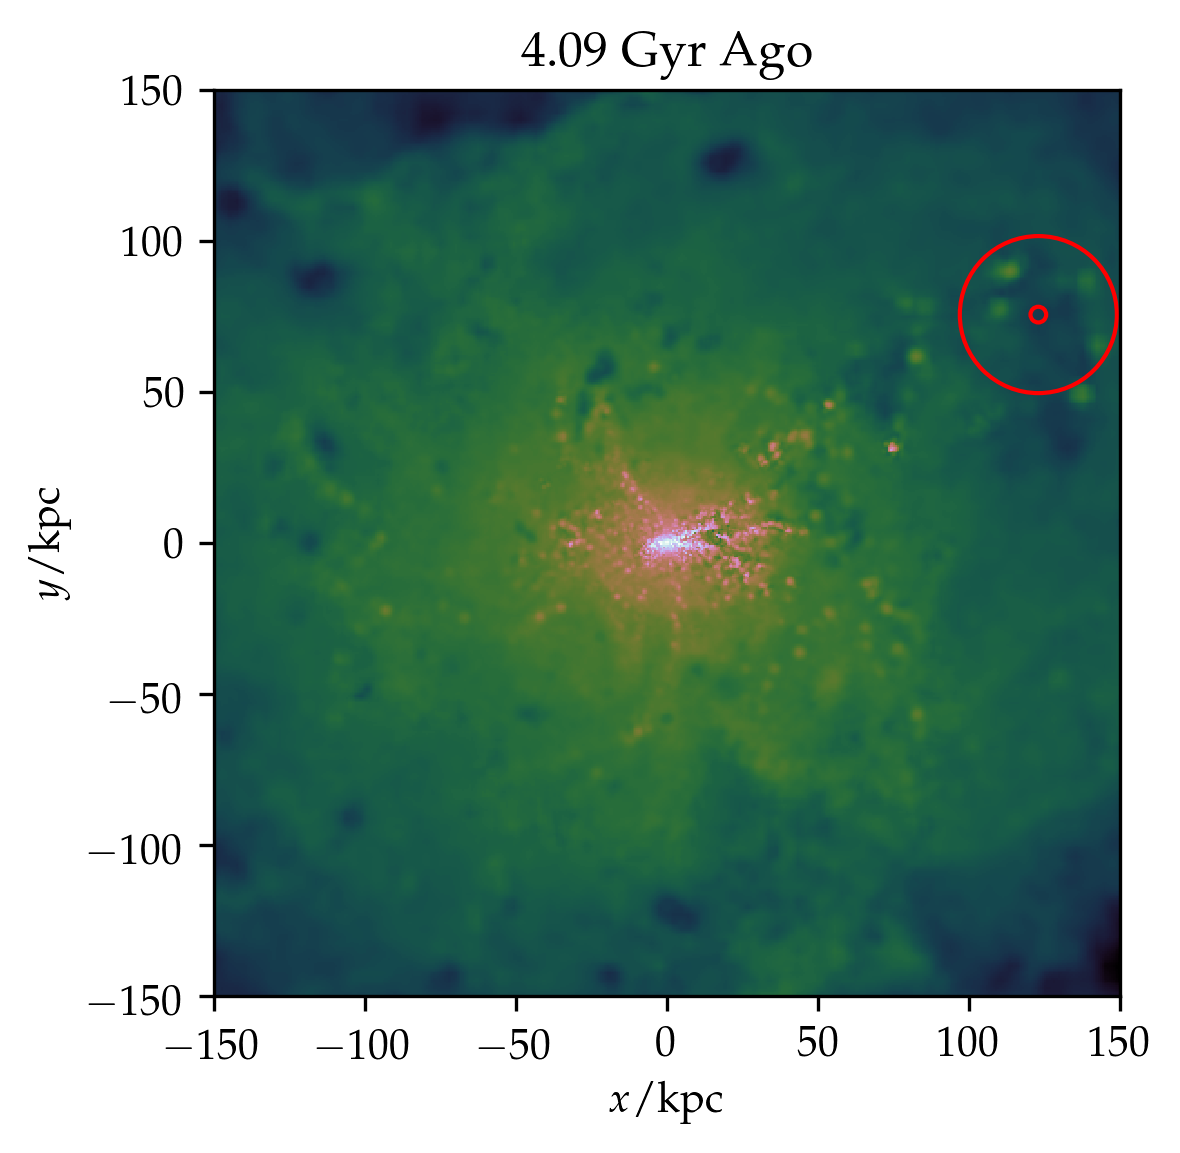

In [16]:
from matplotlib.patches import Circle
x = 15
snapshot = snapshots[x]
haloid = haloids[x]
h1id = h1ids[x]
print('Snapshot %s' % snapshot)
s = pynbody.load(path+snapshot)
s.physical_units()
h = s.halos()
halo = h[haloid]

print('Centering...')
pynbody.analysis.halo.center(h[1])


h1 = h[h1id]
x = float(halo.properties['Xc']) - float(h1.properties['Xc']) 
y = float(halo.properties['Yc']) - float(h1.properties['Yc']) 
print('Relative x,y is %.2f,%.2f' % (x,y))


age = 13.800797497330507
time = float(halo.properties['time'].in_units('Gyr'))

width=300

%matplotlib inline
fig, ax = plt.subplots(1,1, dpi=300)
print('Generating Image..., width %s kpc' % width)
pynbody.plot.sph.image(s.g, cmap='cubehelix',width='%s kpc' % width, subplot=ax,show_cbar=False,title='%.2f Gyr Ago' % (age-time))

rvir = int(float(halo.properties['Rvir']))
circ = Circle((x,y),radius=rvir,ec='r',fc='none')
ax.add_patch(circ)
circ = Circle((x,y),radius=rvir/10,ec='r',fc='none')
ax.add_patch(circ)

# plt.savefig('Movie2/%s.png' % snapshot, dpi=300)
plt.show()

In [7]:
print(rvir)

26


In [66]:
times, Prams, Prests = [],[],[]

for haloid, snapshot in zip(np.flip(haloids[15:36]),np.flip(snapshots[15:36])):
    print('Snapshot %s' % snapshot)
    s = pynbody.load(path+snapshot)
    s.physical_units()
    h = s.halos()
    halo = h[haloid]

    pynbody.analysis.halo.center(halo)
    
    rvir = halo.properties['Rvir']
    h1v = np.array([h[1].properties['VXc'], h[1].properties['VYc'], h[1].properties['VZc']])
    v = np.array([halo.properties['VXc'], halo.properties['VYc'], halo.properties['VZc']]) - h1v

    r_inner = rvir
    r_outer = 3*rvir
    
    inner_sphere = pynbody.filt.Sphere(str(r_inner) + ' kpc', [0,0,0])
    outer_sphere = pynbody.filt.Sphere(str(r_outer) + ' kpc', [0,0,0])
    env = s[outer_sphere & ~inner_sphere].gas
    
    
    env_volume = 4/3 * np.pi * (r_outer**3 - r_inner**3)
    env_mass = np.sum(env['mass'].in_units('Msol'))
    env_v = np.mean(np.array(env['mass'])[np.newaxis].T*np.array(env['vel'].in_units('kpc s**-1')))/env_mass - h1v
    
    Pram = env_mass / env_volume * np.sum((v - env_v)**2)
    
    mass = np.sum(halo.gas['mass'].in_units('Msol'))
    volume = 4/3 * np.pi * rvir**3
    Prest = mass / volume * np.sum((v)**2)
    
    Prams.append(Pram)
    Prests.append(Prest)
    times.append(float(halo.properties['time'].in_units('Gyr')))
    
Prams, Prests, times = np.array(Prams), np.array(Prests), np.array(times)

Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.001344
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.001440
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.001475
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.001536
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.001632
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.001728
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.001740
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.001824
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.001920
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002016
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002088
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002112
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002208
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002304
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002400
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002496
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002554
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002592
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002688
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002784
Snapshot h329.cosmo50PLK.3072gst5HbwK1BH

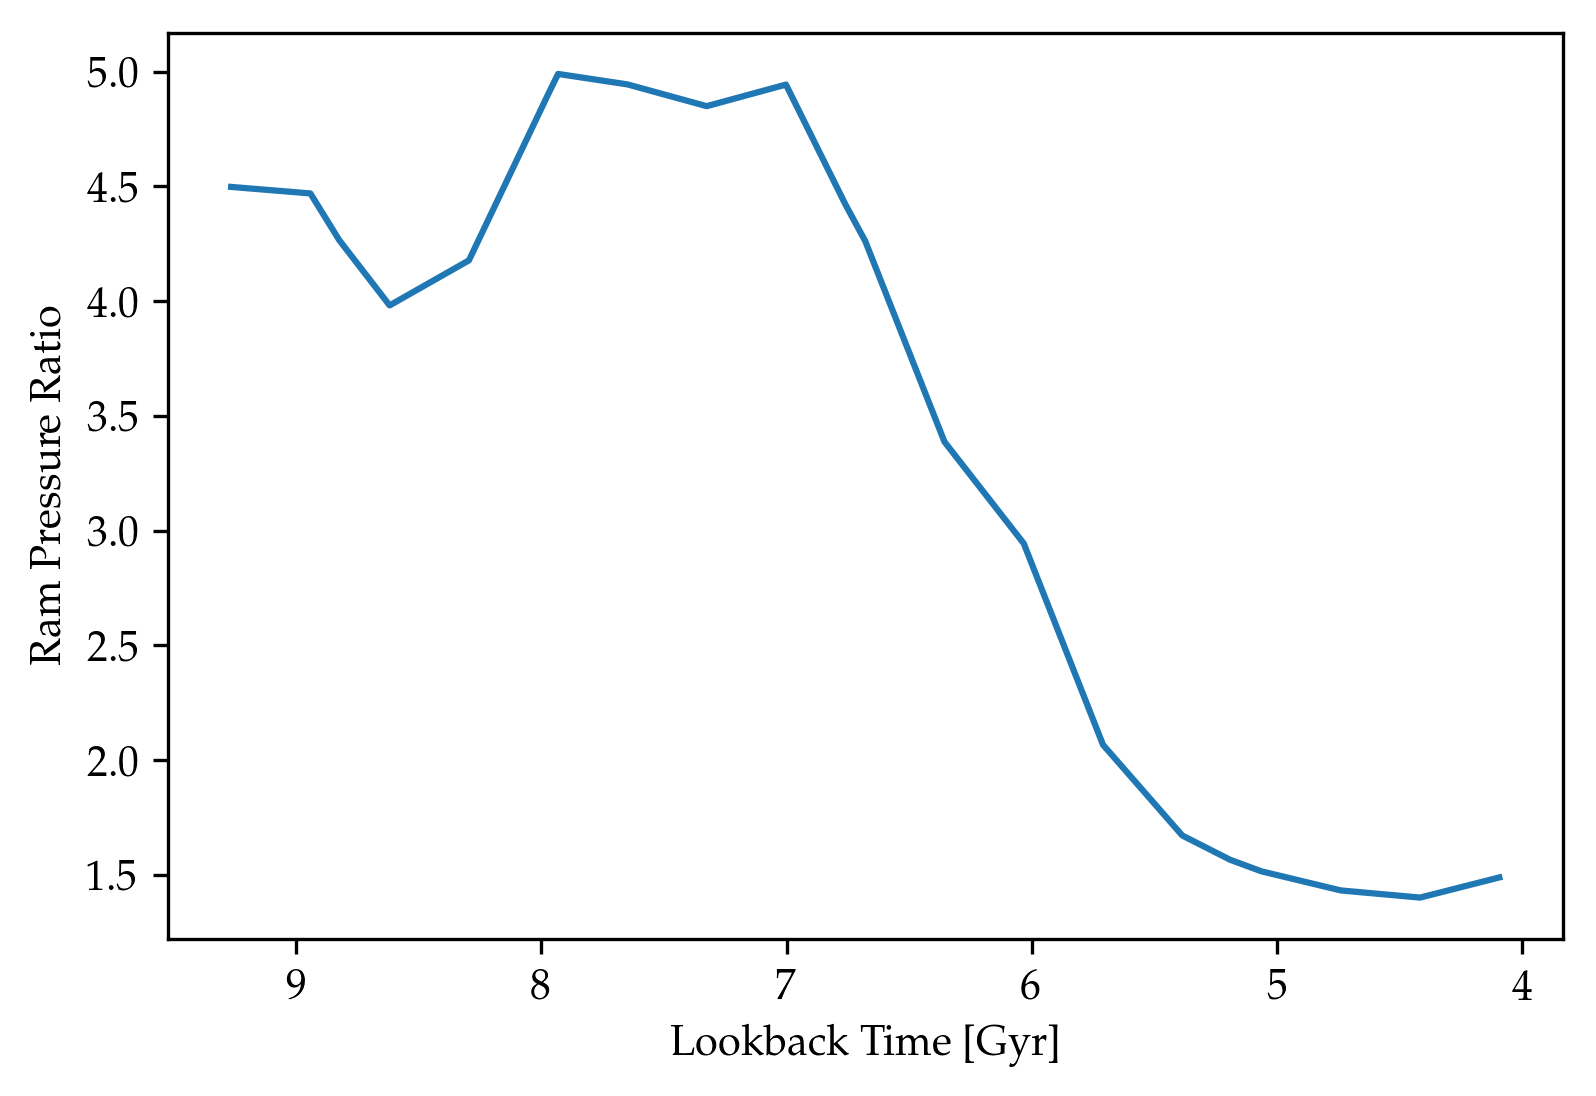

In [67]:
plt.figure(dpi=300)
plt.plot(13.8-np.array(times), Prams/Prests)
plt.xlabel('Lookback  Time [Gyr]')
plt.ylabel('Ram Pressure Ratio')
plt.gca().invert_xaxis()
plt.show()

In [21]:
print(envdensity)

[SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol'), SimArray(0., 'Msol')]


In [34]:
snapshot = snapshots[20]
haloid = haloids[20]
print('Snapshot %s' % snapshot)
s = pynbody.load(path+snapshot)
s.physical_units()
h = s.halos()
halo = h[haloid]

rvir = halo.properties['Rvir']
# halo_coords = [float(halo.properties['Xc']),float(halo.properties['Yc']),float(halo.properties['Zc'])]
pynbody.analysis.halo.center(halo)


extent = 4
for extent in [3,4,5,7,9,12,15]:
    inner_sphere = pynbody.filt.Sphere(str(2*rvir) + ' kpc', [0,0,0])
    outer_sphere = pynbody.filt.Sphere(str(extent*rvir) + ' kpc', [0,0,0])
    env = s[outer_sphere & ~inner_sphere].gas

    env_volume = 4/3 * np.pi * ((rvir*extent)**3 - rvir**3)
    env_mass = np.sum(env['mass'].in_units('Msol'))

    print(f'From 1 to {extent} Rvir, gas density is {env_mass/env_volume:.2f}')

Snapshot h329.cosmo50PLK.3072gst5HbwK1BH.002496
From 1 to 3 Rvir, gas density is 178.01
From 1 to 4 Rvir, gas density is 219.95
From 1 to 5 Rvir, gas density is 221.74
From 1 to 7 Rvir, gas density is 171.00
From 1 to 9 Rvir, gas density is 122.87
From 1 to 12 Rvir, gas density is 106.95
From 1 to 15 Rvir, gas density is 196.85
